source: https://brohrer.mcknote.com/zh-Hant/how_machine_learning_works/how_rnns_lstm_work.html

## 晚餐要吃什麼
* 為了理解 LSTM 的運作原理，我們可以考慮一下「晚餐要吃什麼」這個問題
* 假設讀者住在公寓，很幸運地有個愛煮晚餐的室友。每天晚上室友都會準備壽司、鬆餅或披薩
* 為了預測晚餐，讀者建了一個神經網路模型。這個模型的輸入資料包括星期幾、第幾個月、以及室友是否開會開到很晚等會影響晚餐的因素
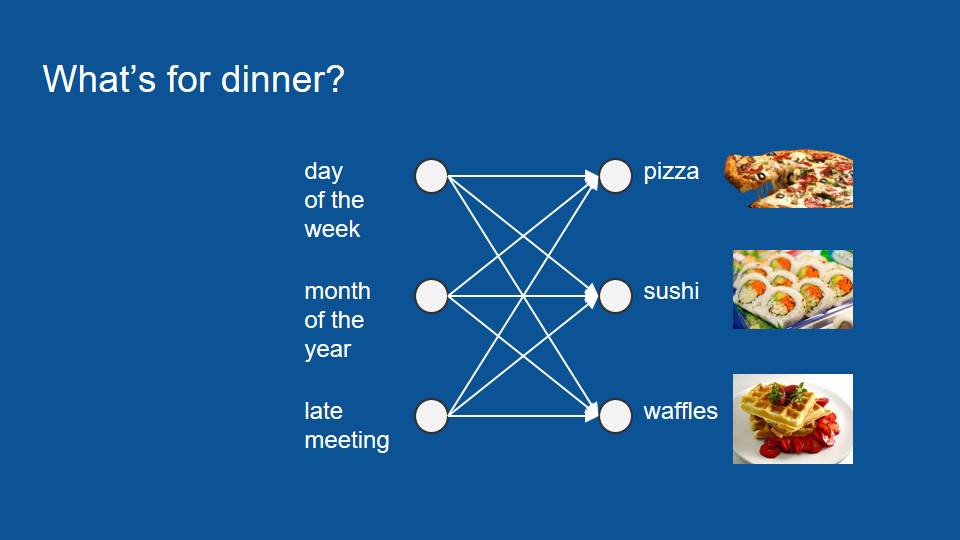
* 用這種方法訓練的模型，表現並不是很好。就算我們謹慎挑選輸入資料並訓練模型，它的表現還是沒有比隨機猜測好上多少

* 先退一步回顧資料，可以幫助我們找出其中的規律
* 於是我們發現，原來室友在做完披薩後的隔天會準備壽司，再隔一天會準備鬆餅，然後又回去做披薩，就這樣持續下去
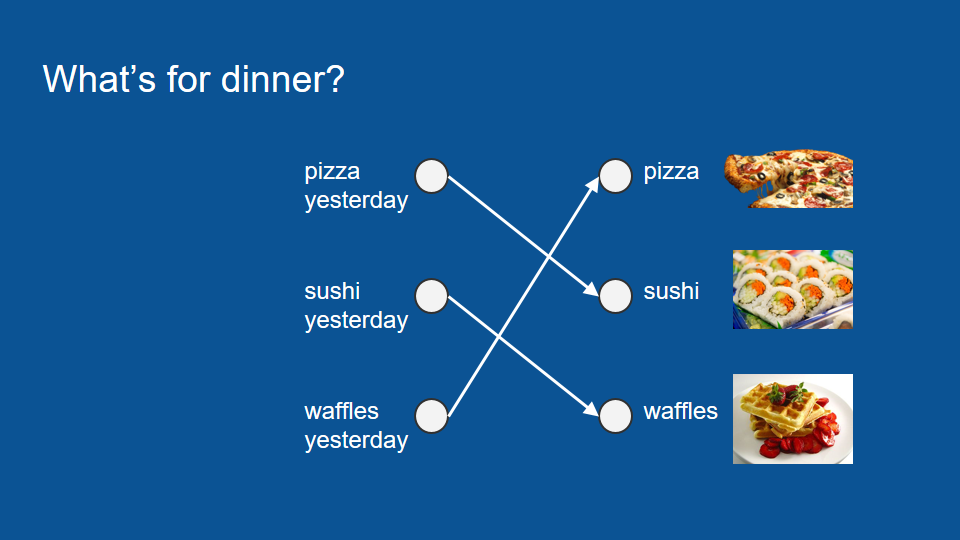
* 在這個新的模型裡，唯一重要的因素只有昨天吃過的晚餐

* 現在考慮另一個情況：如果讀者有某一晚不在家，像是昨天晚上出門了，那就無從得知昨天晚餐吃什麼。不過，我們還是能從幾天前的晚餐推測今天會吃什麼
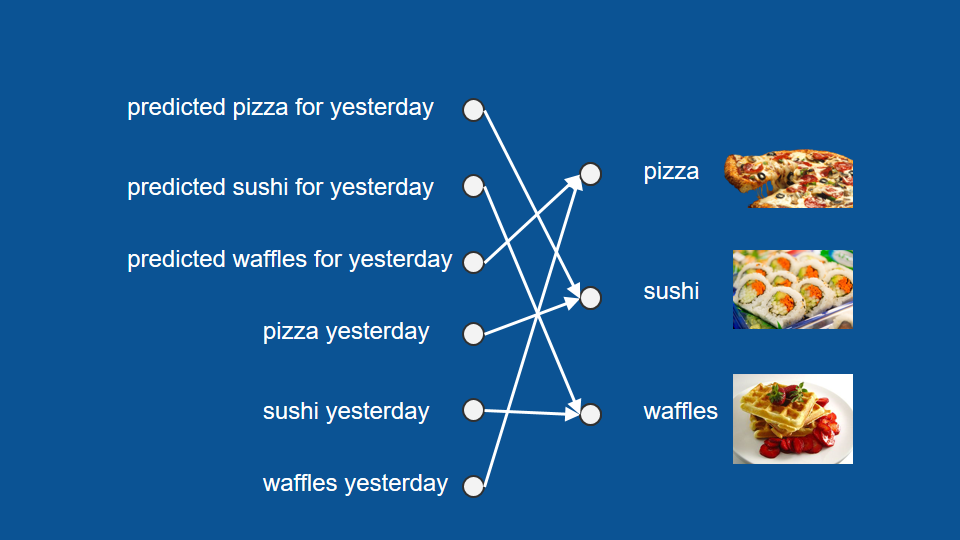

## 向量和 one-hot 編碼
* 先岔開談一談什麼是向量（vector）
* 向量只是用來表示一組數字的數學名詞
* 描述某一天的天氣，我可以說當天的最高溫是華氏 76 度（約攝氏 24.5 度），最低溫是 43 度（約攝氏 6 度），風速是每小時 13 英里（約 21 公里），而且降下 0.25 吋（約 6.4 公釐）雨量的機率是 83%
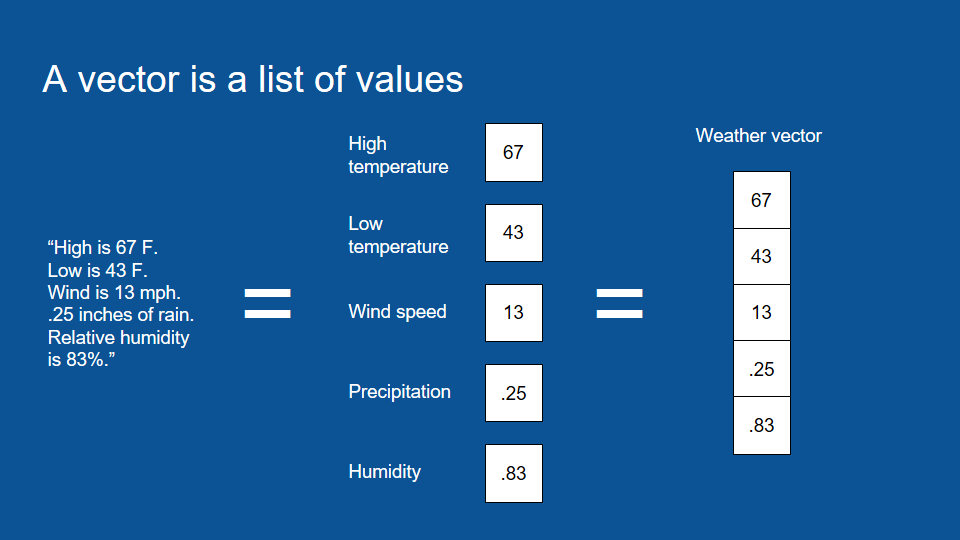

* 就連 「今天是週二」這個概念，我們也可以利用向量表示
* 先在向量中包含所有可能的值，也就是週一到週日，再為每個值賦予特定的數字，將週二設為 1（Boolean True），其他日子設為 0（Boolean False）
* 這種格式被稱作 one-hot 編碼（或譯作「獨熱編碼」），而這種包含一連串 0、只有一個 1 的向量在資料分析中也很常見。
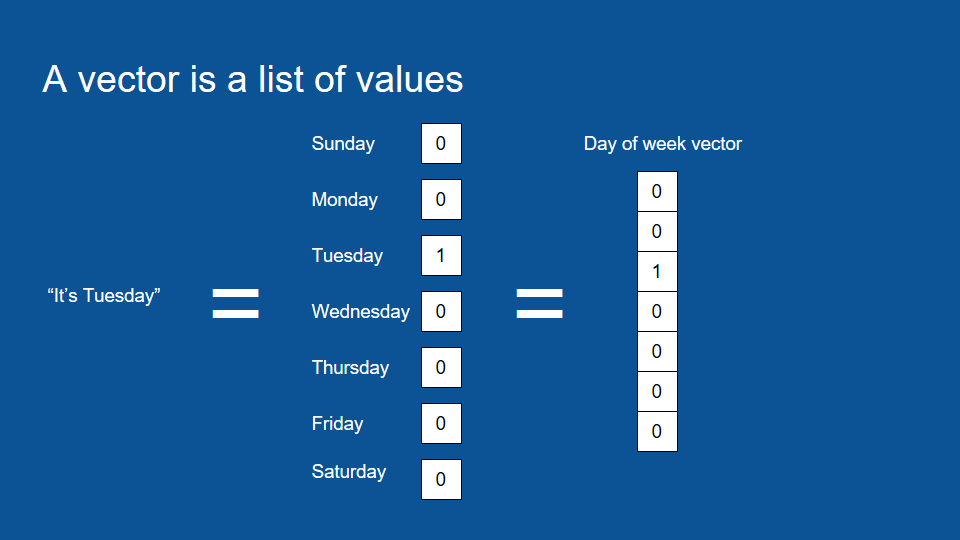

* 我們可以將「今天晚餐吃甚麼」的預測轉換成一個 one-hot 向量，將預測結果之外的數值都設為 0
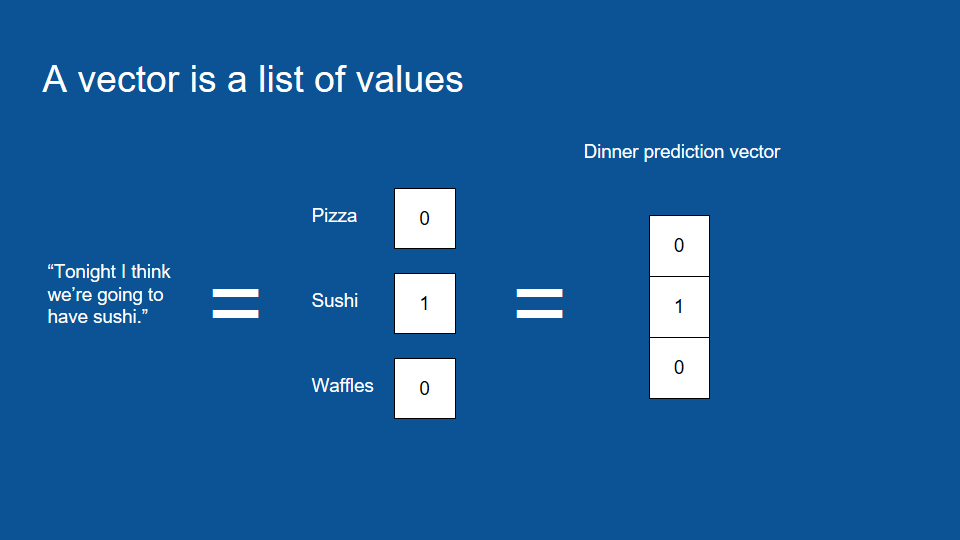

* 我們可以將所有的輸入和輸出組合成幾個向量
* 我們歸納出的三個向量：昨天的預測、昨天的結果、以及今天的預測
* 這裡的神經網路架構即為每個輸入因素和輸出因素間的關聯（connection）
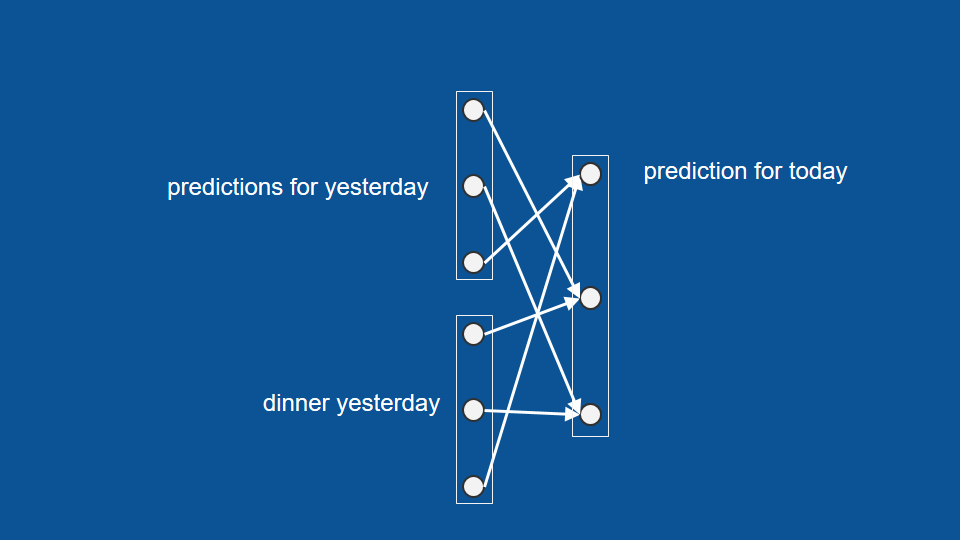

* 加上今日預測結果的回收循環
* 下圖中的虛線，表示了今天的預測結果如何在明天被重新利用，成為明天的「昨日預測」
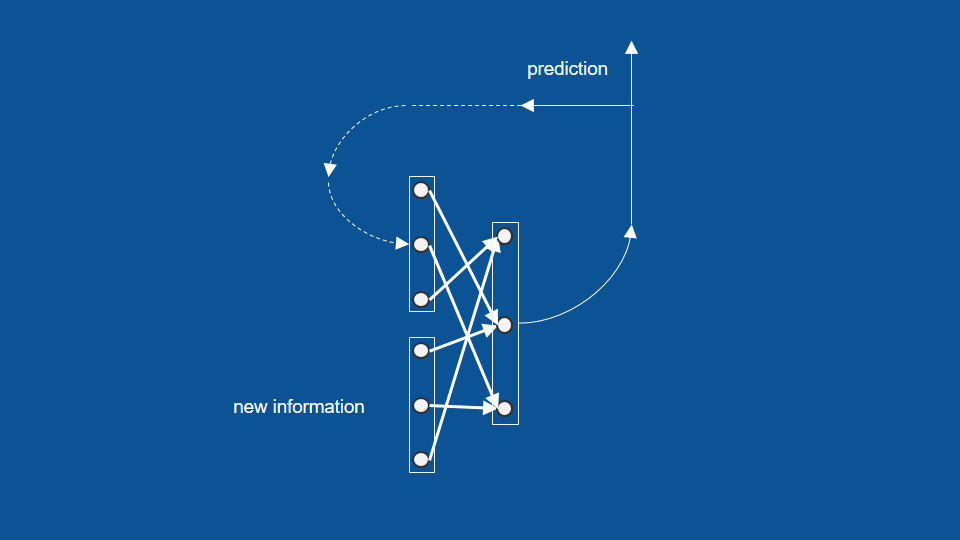

* 延伸過後的神經網路如下圖所示
* 我們可以從最前端一直往過去的資料延伸，看更早之前的晚餐是甚麼
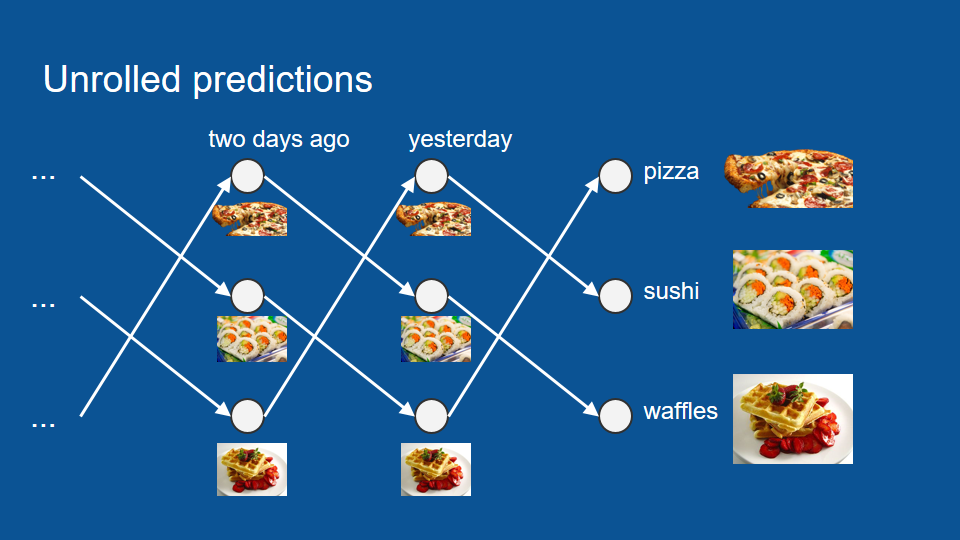

## 寫一本童書
* 這個模型的限制
* 換一個寫童書的例子
* 本童書裡只有三種句子：「道格看見珍（句號）」、「珍看見小點（句號）」、以及「小點看見道格（句號）」
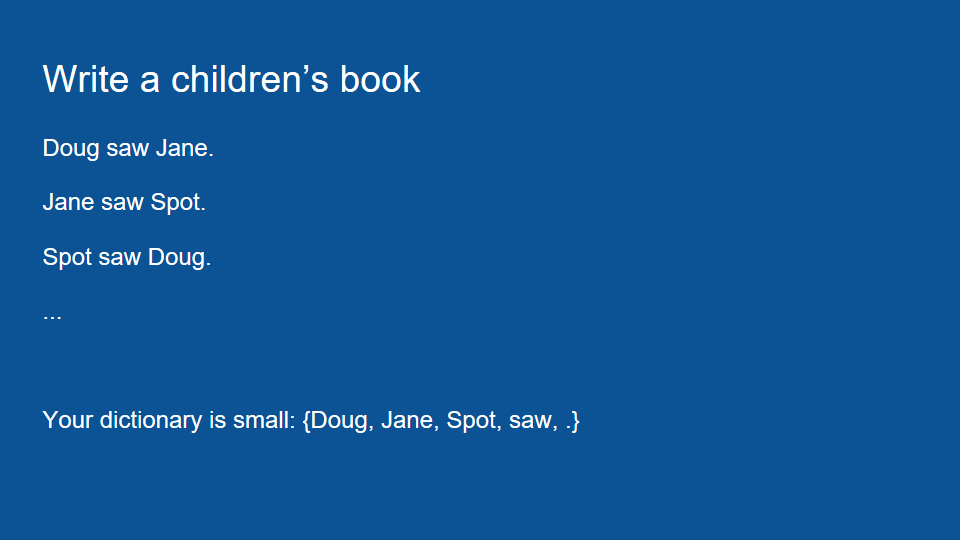

* 這本童書的字彙量很小，只有「道格」、「珍」、「小點」、「看見」以及「句號」
* 先將前面的晚餐向量，換成這個例子裡的字典向量
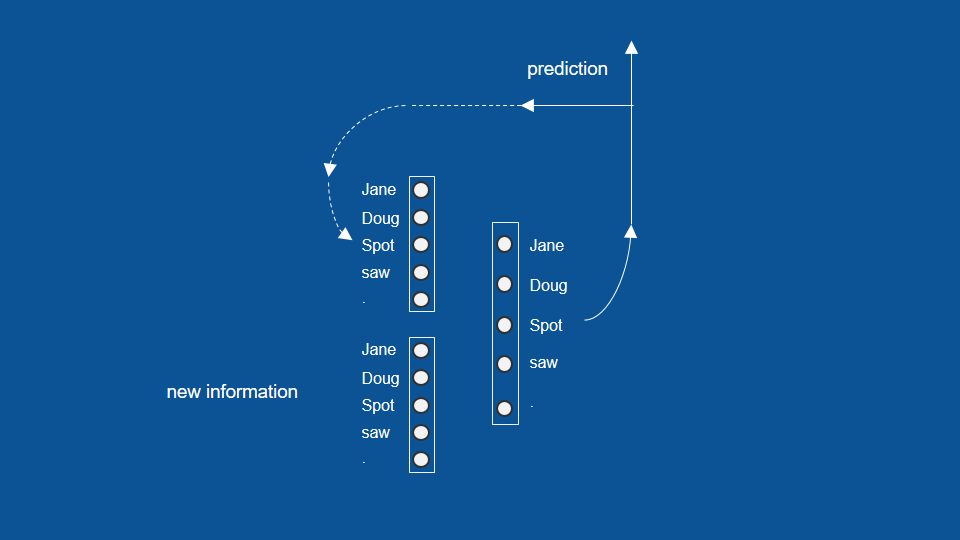

* 用前面的方法（即 one-hot）表達不同單字
* 如果道格是我最後讀到的單字，那我的資訊向量中，就只有道格的數值為 1，其他的數值都為 0。
* 經過一定的訓練後，我們應該能從模型中看出一些特定的規律
* 像是在「珍、道格、小點」之後，模型預測「看見」和「句點」的機率應該會大幅提升，因為這兩個單字都會跟著特定名字出現。
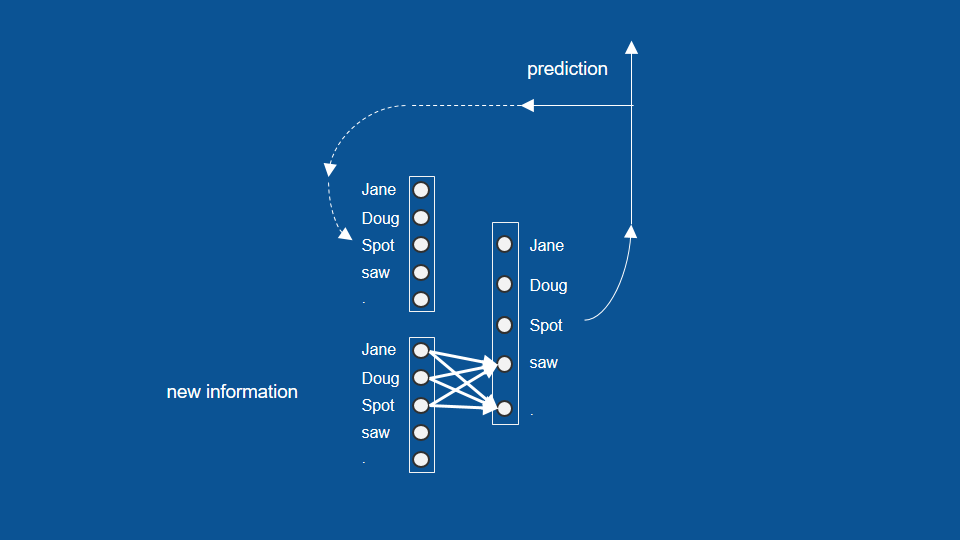

* 同樣地，如果我們前一次預測了名字，那這些預測也會加強接下來預測「看見」或「句號」的機率
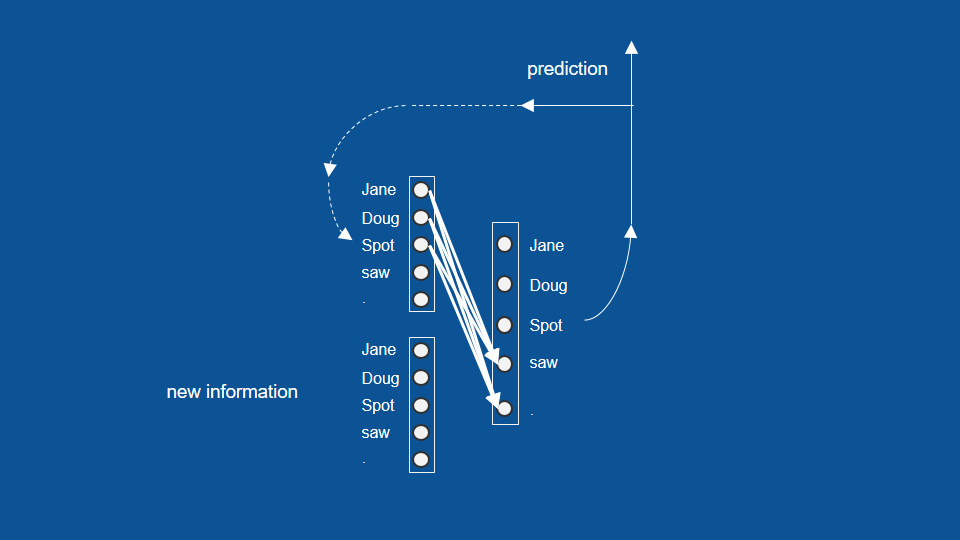

* 如果我們看到「看見」或「句號」，也能想像模型接下來會傾向於預測「珍、道格、小點」等名字。
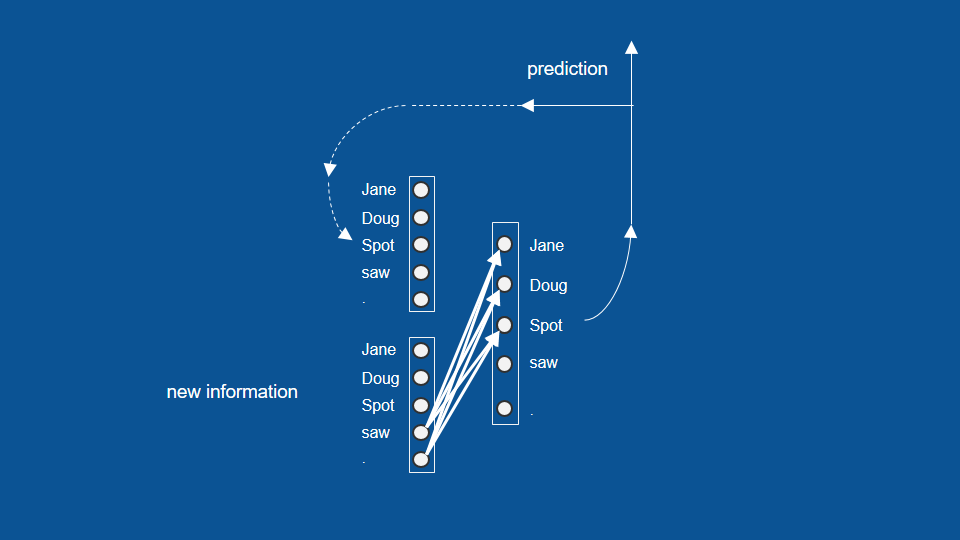

* 這個流程和架構視為一個 RNN 模型
* 為了簡單起見，這裡我將向量和投票權重用一個包含點和線（箭頭）的符號代替。
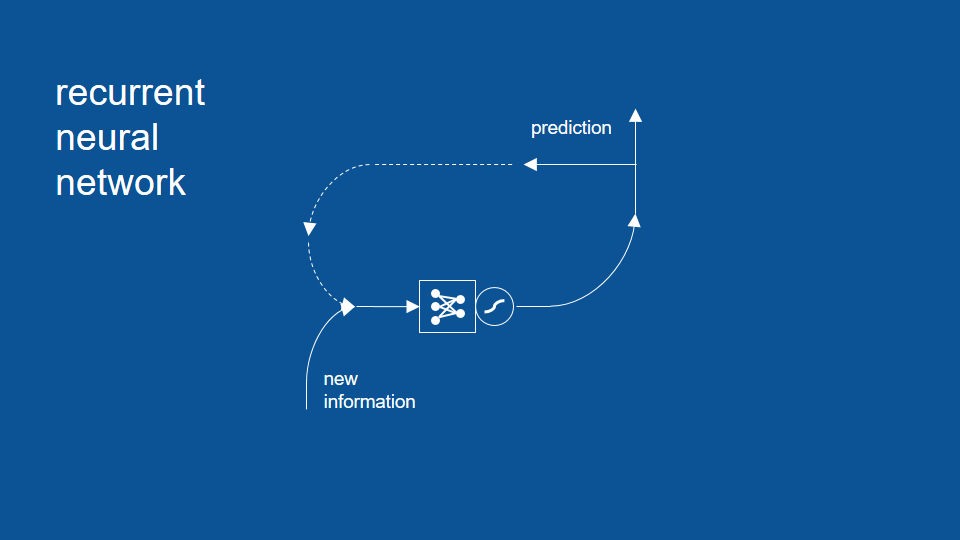

## 擠壓函數（雙曲正切函數）
* 波浪符號代表擠壓函數（squashing function，又譯作 S 函數）
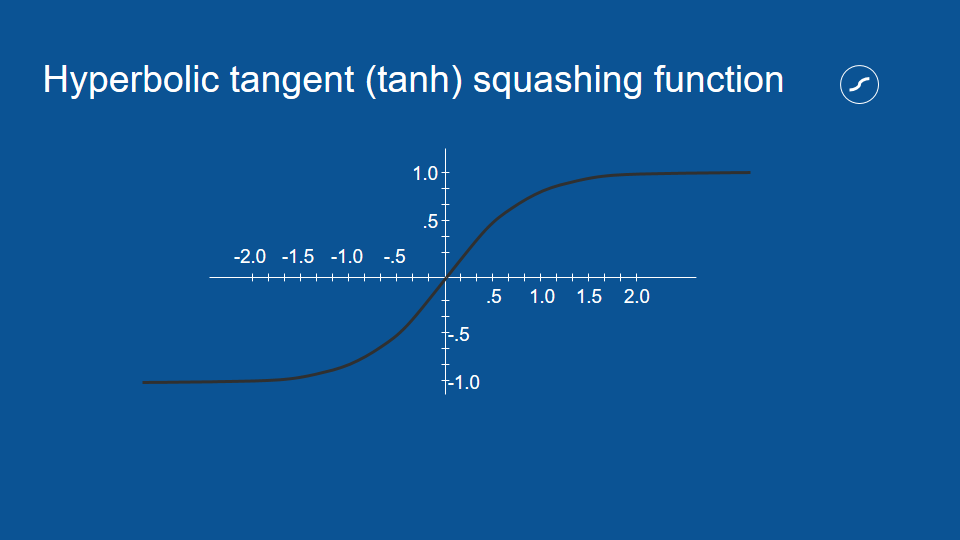

* 擠壓函數的功用，是將模型的投票結果限制在特定範圍之間
* 比方說，如果有個投票結果得到 0.5 的值，我們可以在擠壓函數上畫一條 x = 0.5 的垂直線，並得到水平對應的 y 值，也就是擠壓過後的數值。
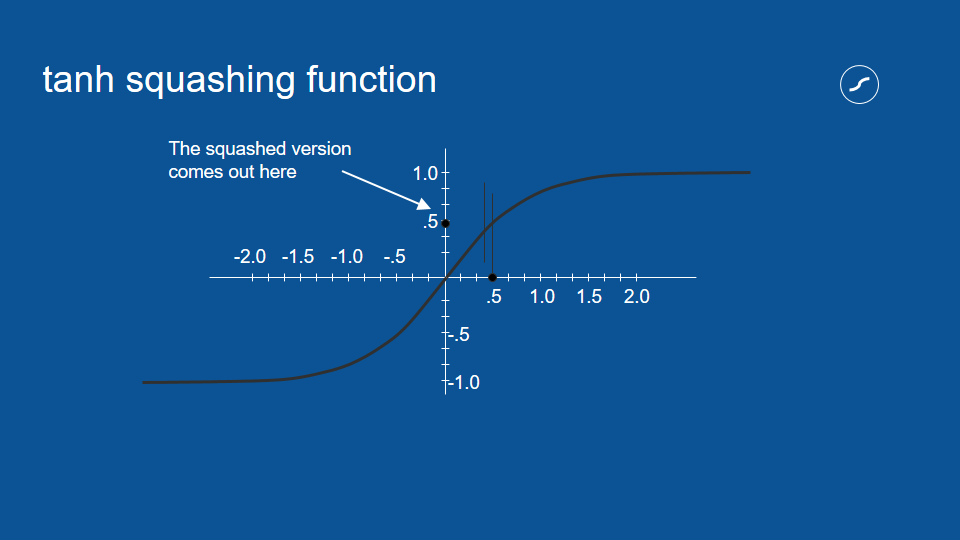

* 對於小的數值而言，原始數值和擠壓過構的數值通常很相近
* 隨著(正)數值增大，擠壓過後的數值會越來越接近 1
* 隨著數值愈趨負無窮大，擠壓過後的數值也會越來越接近 -1。
* 擠壓過後的數值都會介於 1 和 -1 之間。
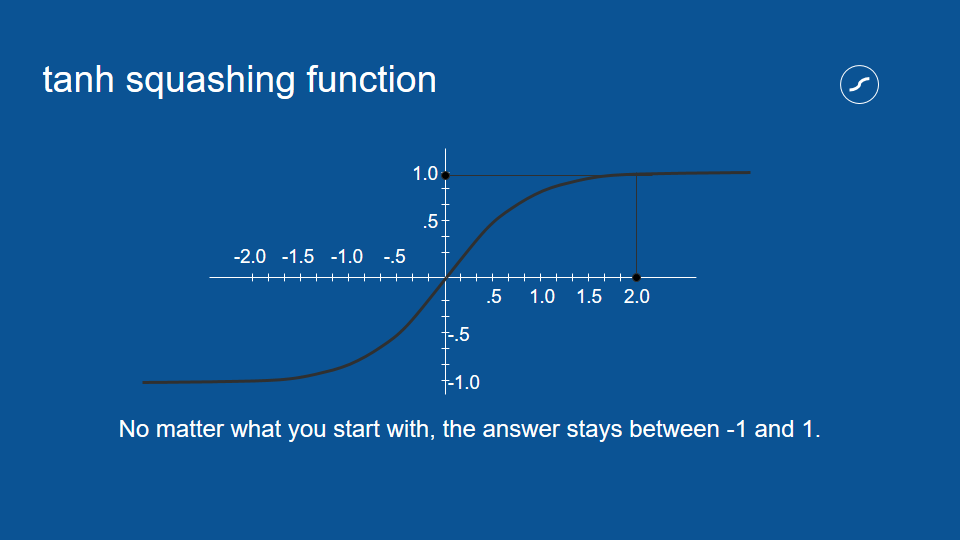  

* 擠壓函數的處理，對於神經網路這種重複運算相同數值的流程非常有用
* 比方說，如果有個選項每次都得到兩次投票，它的數值也會被乘以二，隨著流程重複，這個數字很容易被放大成天文數字。

## 可能出現的錯誤
* 這個例子裡的神經網路會出現一些錯誤
* 像是得出「道格看見道格（句號）」等句子
* 也可能得到「道格看見珍看見小點看見道格」之類的錯誤。
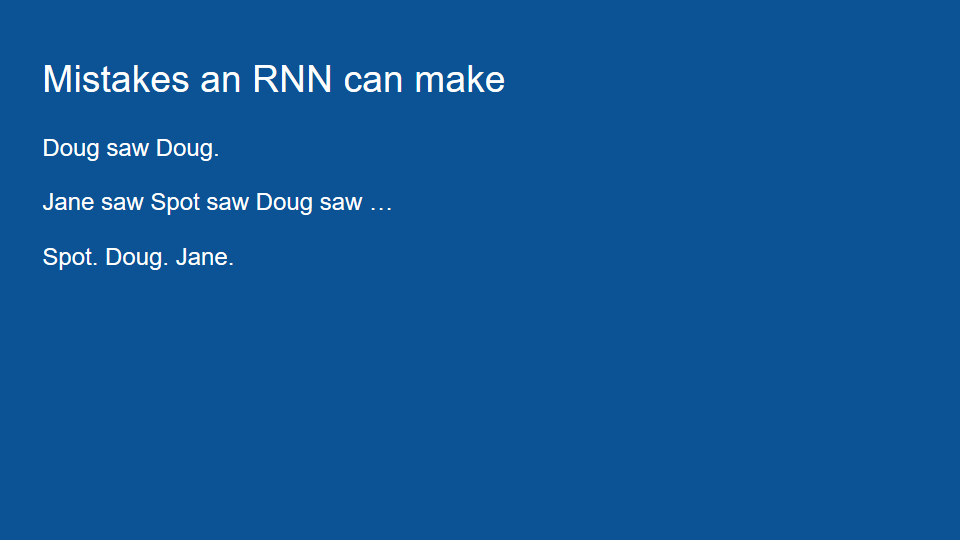
<br>
* 這是因為我們的模型有著很短期的記憶，只會參考前一步的結果，所以它不會參考更早之前的資訊

## 記憶／遺忘路徑
* 新增的關鍵是記憶／遺忘（memory and forgetting）路徑，用於幫助模型能記住幾個循環前發生的事情
* 為了解釋記憶部分的運作原理，我們需要先認識幾個新的符號。
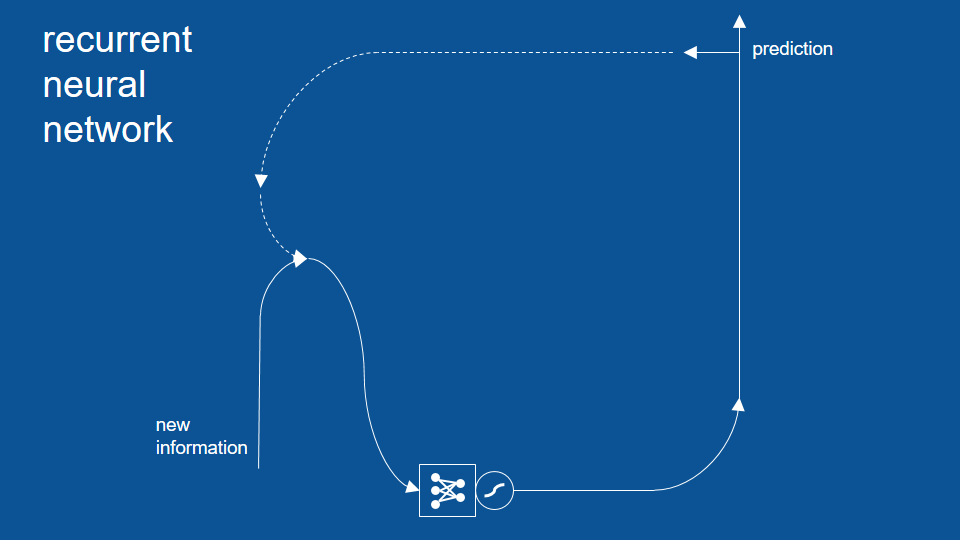

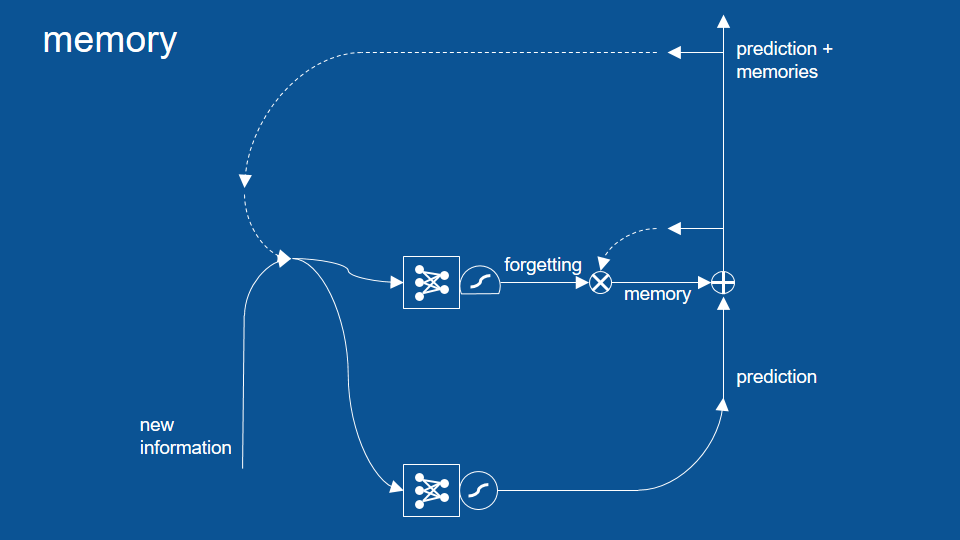

## 逐元素相加、相乘和閘門
* 圈圈裡包含十字的符號是（矩陣）逐元素加法（element by element addition）。
* 運作原理是將兩個相同長度的矩陣按同位置和順序的元素相加
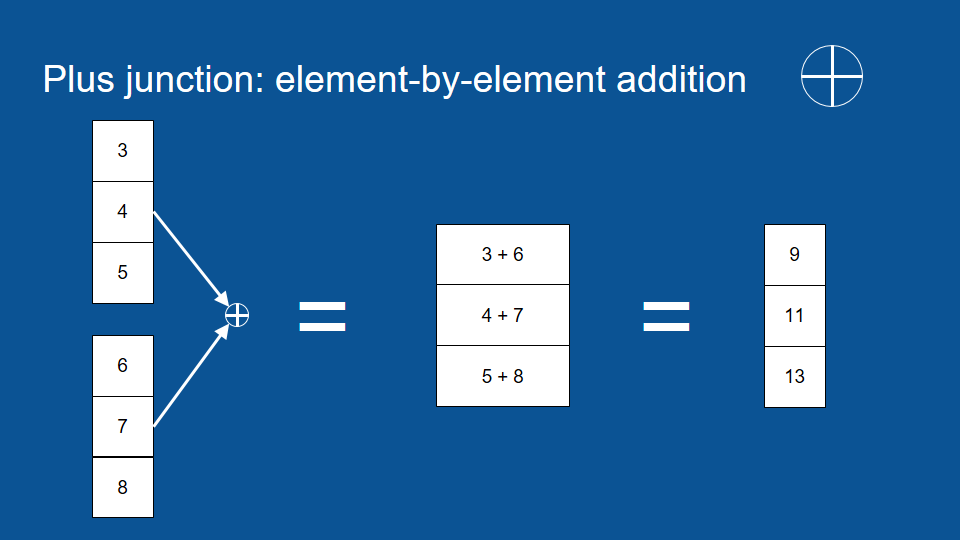

* 圈圈裡有個交叉的符號是（矩陣）逐元素乘法（element by element multiplication）。
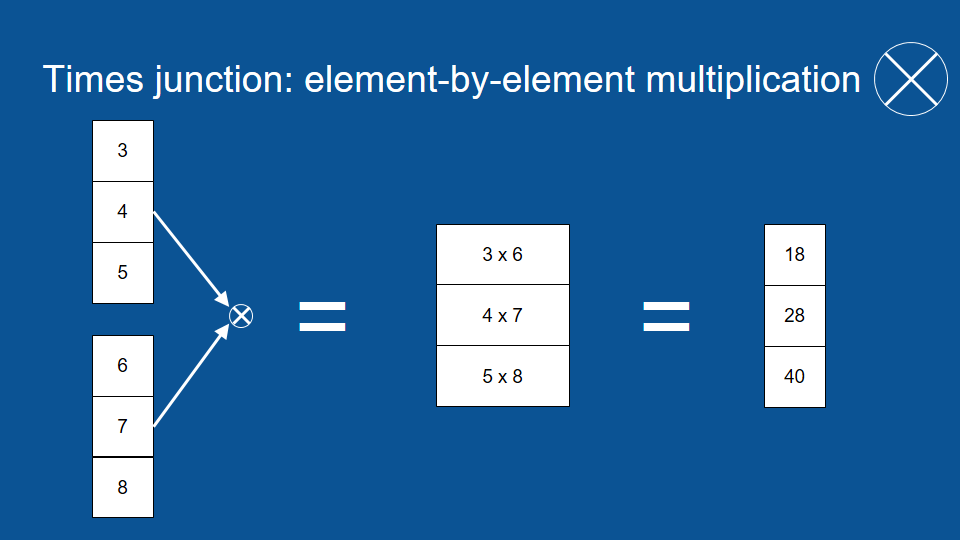

* 逐元素相乘可以幫助我們完成一些很酷的事情。
* 想像有一組訊號，以及一組可以控制水量的水管
* 在這個例子裡，我們把初始訊號都當作 0.8。
* 在每個水管上都有一個龍頭，可以用來全開、全關或任意水量，讓訊號流通或堵塞
* 根據前面提到的逐元素乘法，我們可以在一開始將 0.8 乘上全開的 1，得到原本的訊號 0.8，也會在最後將 0.8 乘上 0，得到被遮蔽的訊號 0
* 這組閘門（gate）可以讓我們控制訊號的流通與否
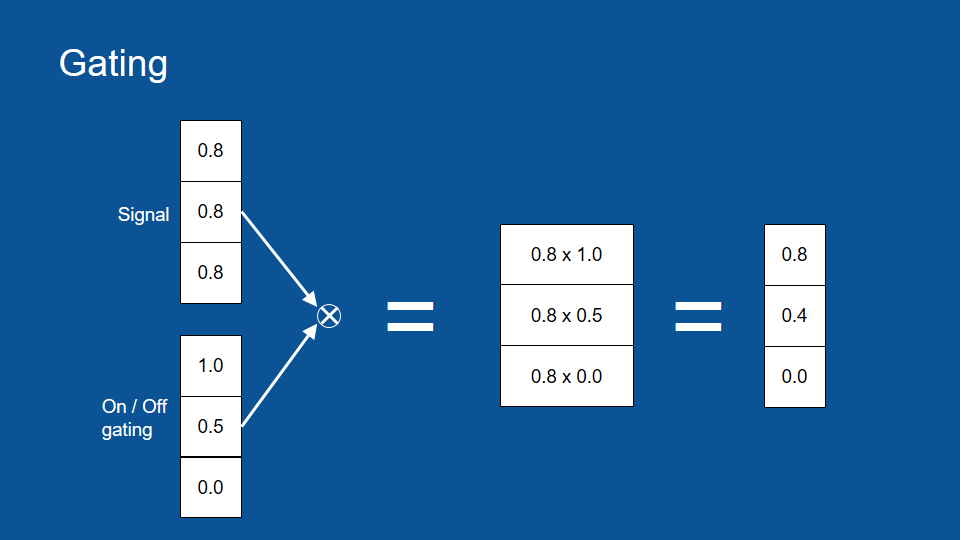

## 擠壓函數（邏輯函數）
* 為了實現上述的閘門，我們需要一組介於 0 和 1 之間的數值
* 這個函數的符號是一個帶有平底的圓形，它被稱作邏輯函數（logistic function）。
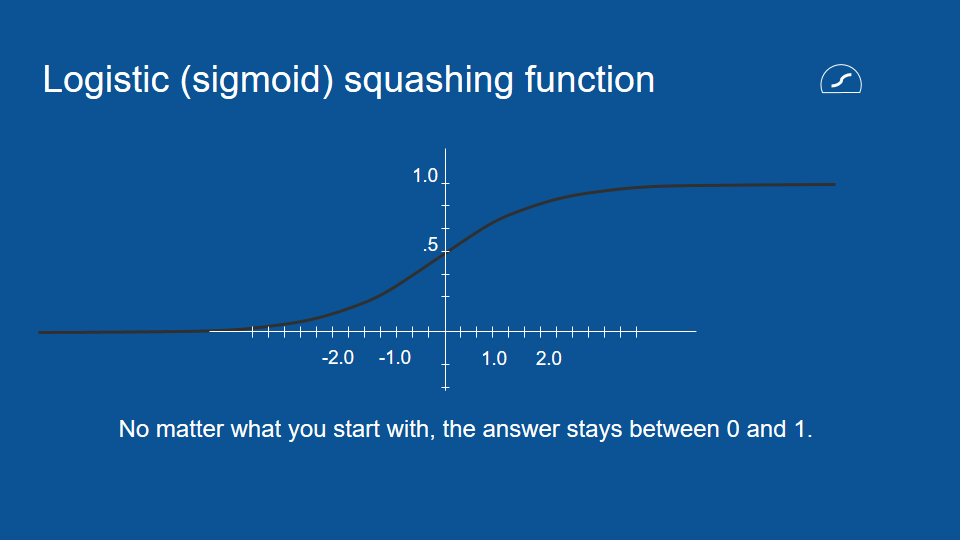

* 在新的模型裡，我們還是會利用先前的預測（昨天的預測）以及新的資訊（昨天的結果）
* 不過在新的模型裡，這些新預測會通過下圖中的新路徑。
* 在這條路徑裡，我們會透過邏輯函數，建立一個回憶或遺忘特定資訊的閘門（即圖中的「圈叉」符號），並將結果加回下次的預測當中
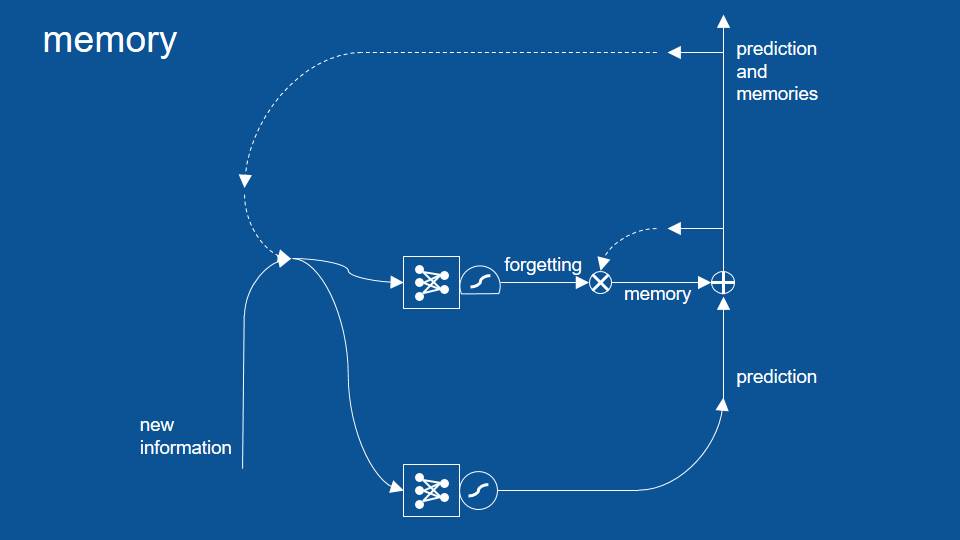
<br>
* 在這個新的循環裡，我們不只有預測，而是由回憶篩選過的預測
* 這些回憶中包含了長久下來模型並未遺忘的資訊。
* 新增的遺忘路徑可以幫助我們保留任意時間長短的資訊。
* 在結合了預測和回憶之後，我們不一定會直接將這組結果當作最終的預測。

## 篩選路徑
* 最後還加上了一個篩選（selection）路徑，將一部分的預測結果保留在模型中。
* 每次循環一開始的新資訊和舊預測，也會用於決定篩選路徑中的閘門大小
* 這組閘門會決定哪些結果該留在模型中，哪些結果該作為最終預測。
* 在篩選路徑前，我們可以看到另一個壓縮函數。因為在這之前我們做了一次逐元素相加 （即圖中的「圈加」符號），預測結果可能會比 1 大或比 -1 小，所以這邊的壓縮函數是用來確保數值大小尚在控制範圍中。
* 每當新預測，也就是一組預測結果（possibilities）產生時
* 我們會將它和過去的回憶(memory)結合
* 並將從中選出(selection)特定幾項作為該次循環的預測結果
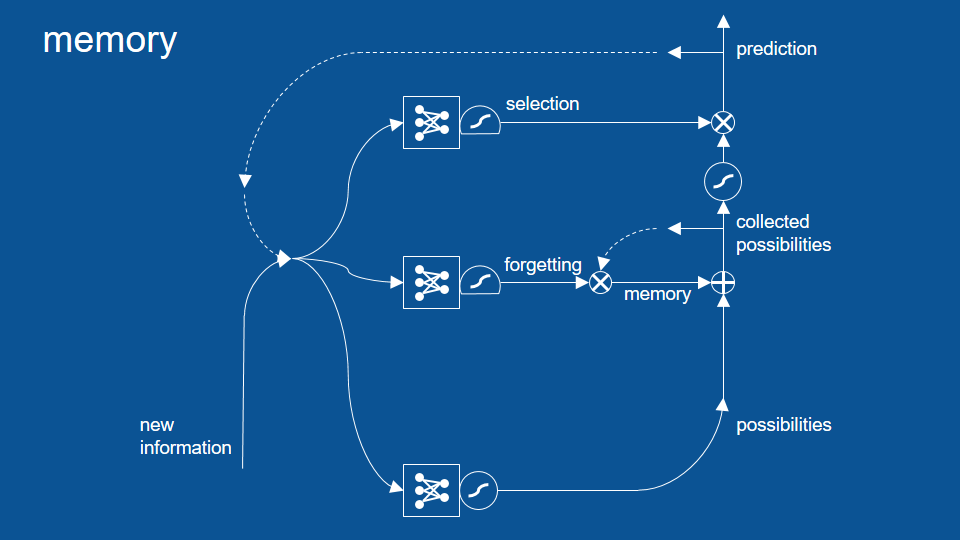

## 忽視路徑
* 新增的忽視（ignoring）路徑可以幫助我們篩選掉初步的預測結果。
* 這項機制是故意的，讓近期內不是很相關的結果先被忽視，避免它們影響之後的路徑
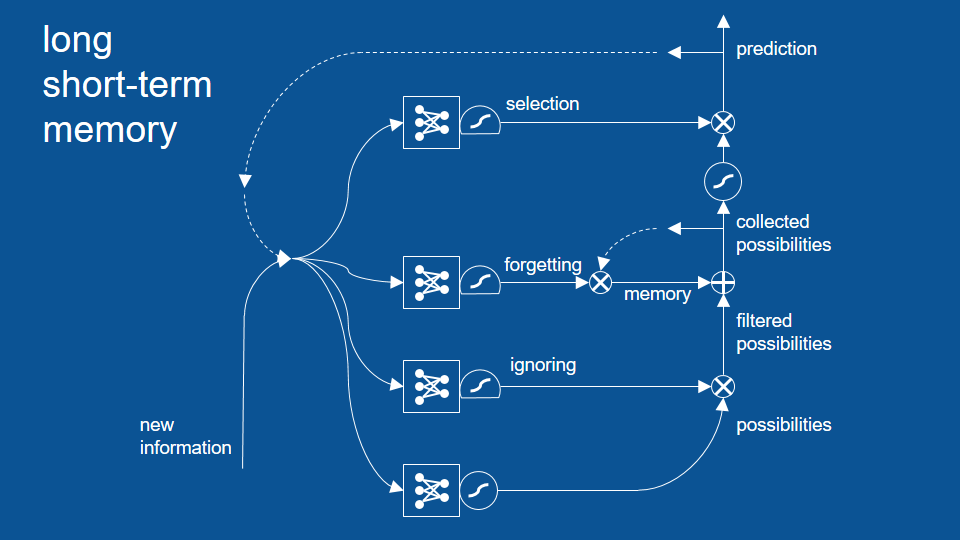

## 「珍看見小點（句號），道格⋯⋯」
* 回到一開始提到的寫童書的例子
* 為了簡單起見，我們可以假設整個 LSTM 模型已經被訓練完畢，也就是說模型裡的投票機制和權重都已經底定了
* 故事到目前為止是「珍看見小點（句號），道格⋯⋯」。「道格」成了目前故事裡的最後一個字
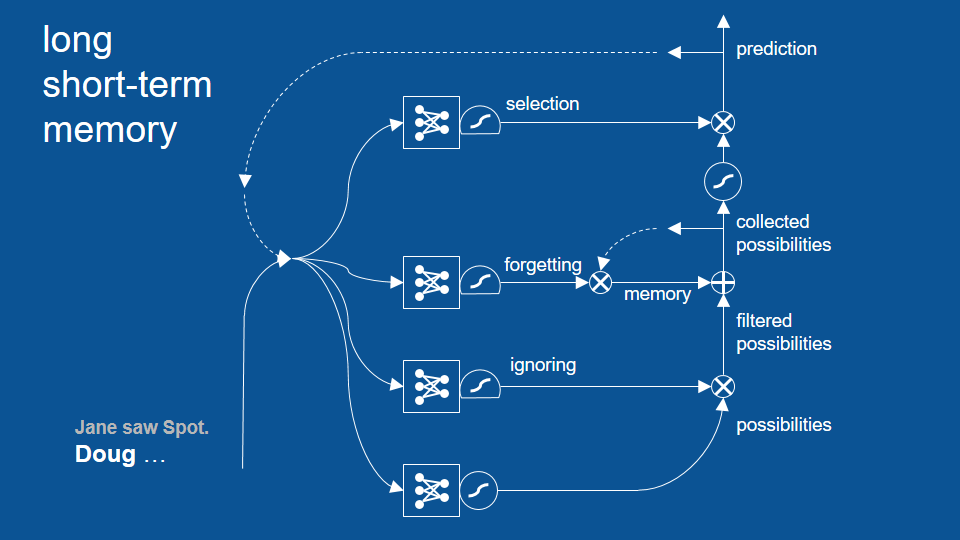

* 前一次的預測結果包含了「道格、珍、小點」等名字
* 這是因為先前我們用句號結束了上個句子，所以下個句子可以用任何名字開頭。
* 於是我們有了新資訊「道格」，以及上次的預測「道格、珍、小點」。
* 接著將這兩組向量輸入包含預測、忽視、遺忘和篩選等四條路徑的模型中。
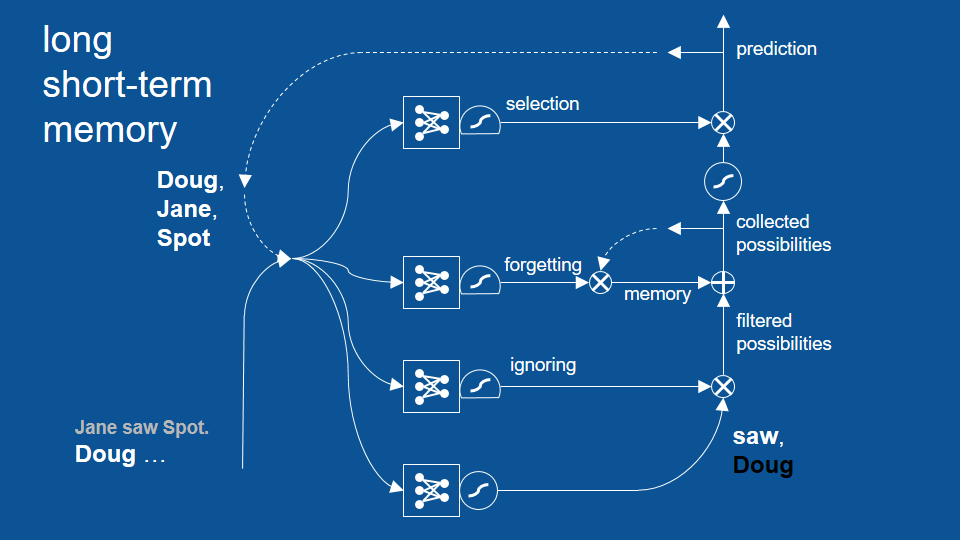

* 模型中的第一步是先做出預測
* 可以判斷接下來出現「看見」的機率很高
* 也會判斷短期內不該再出現「道格」
* 所以路徑最後會產出「看見」的正預測（positive prediction）和「道格」的負預測（negative prediction）
* 在這個簡單的例子裡，我們可以不用考慮忽視路徑
* 同樣地，為了簡單起見，我們就當作這個模型裡還沒有任何回憶，所以預測結果又直接進到了篩選路徑。
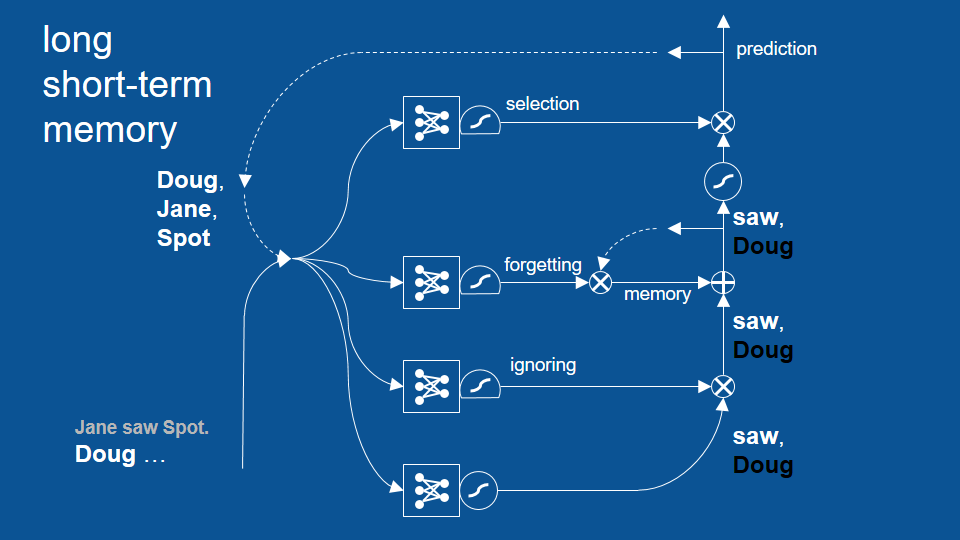

* 由於篩選機制已經學習了「在前一個單字是名字的狀況下，接下來的結果只能是『看見』或句號」這項規則
* 於是「非道格」這項預測就被擋掉了
* 剩下「看見」成為最終預測
* 接著利用這個結果，開始下一個預測循環
* 在新的循環裡，「看見」同時是新資訊和舊預測，並和前一次循環一樣，走過四條路徑並形成新的預測。
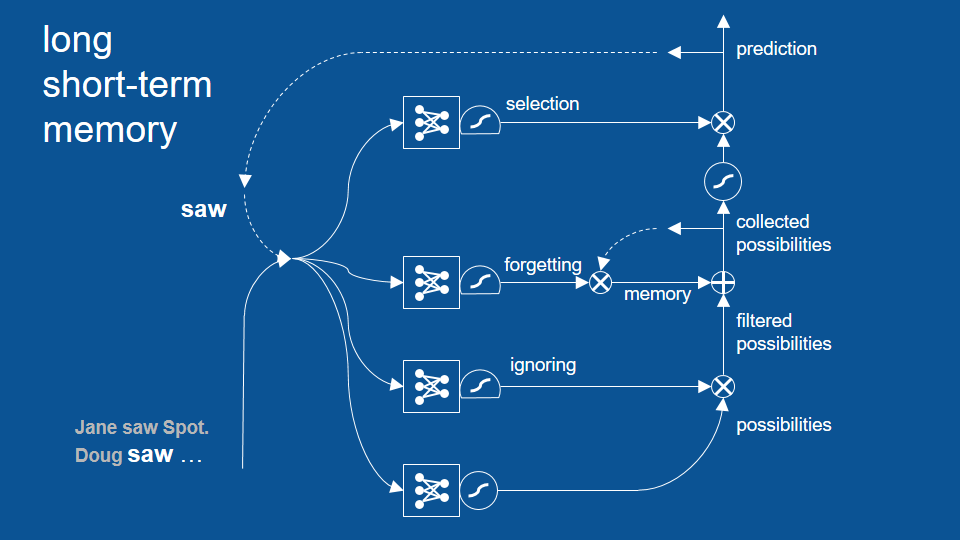

* 由於「看見」才剛出現，我們預測下個字應該是「道格、珍、小點」其中之一
* 同樣地，在這個簡單的例子裡我們可以先跳過忽視路徑，並讓這三個預測進入下個路徑。
* 這個路徑也包括我們前一循環的預測結果，也就是「非道格」和「看見」
* 遺忘閘門的思路是：「嘿，既然前一個單字是『看見』，根據經驗我可以將回憶中的『看見』忘掉，保留名字就好。」
* 於是這條路經將前一次預測（看見、非道格）中的「看見」給忘了，並接著將「非道格」加入了初步的預測結果（道格、珍、小點）當中。
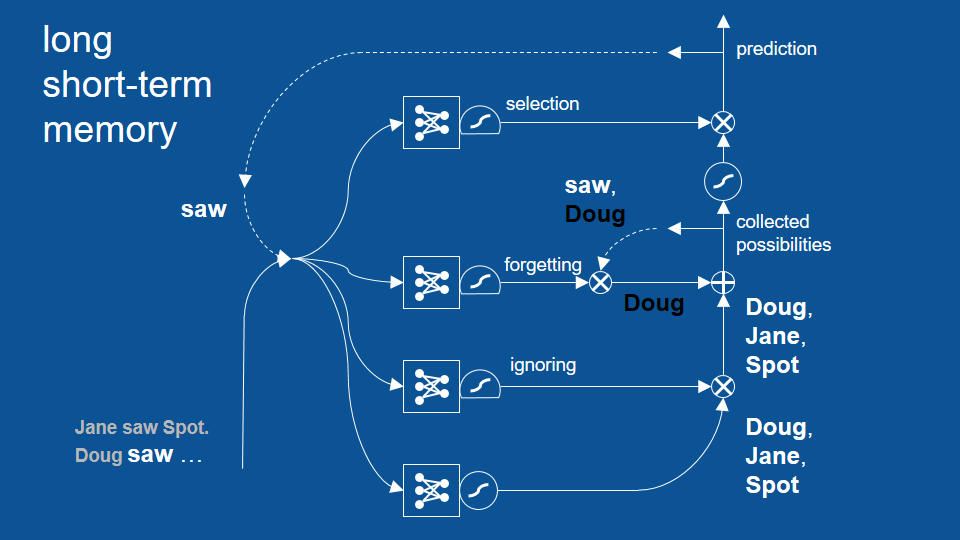

* 最後在這條路徑裡，「道格」的預測正負抵消，只留下了「珍」和「小點」繼續前往下條路徑。
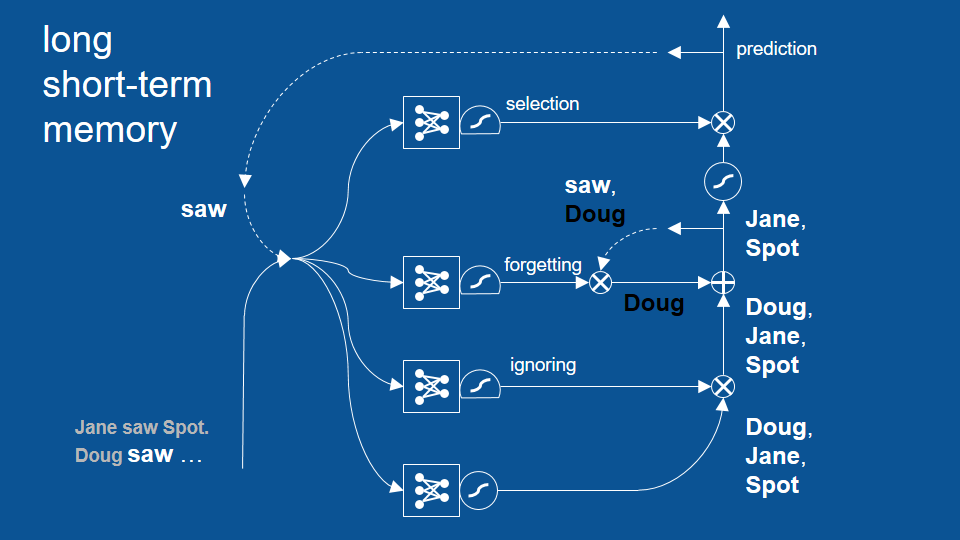

* 篩選閘門已經知道當「看見」是前一個單字時，下個出現的單字應該是一個名字，所以它讓「珍」和「小點」雙雙通過。
* 於是，在最後的預測結果中，我們得到了 「珍」和「小點」，但沒有「道格」。
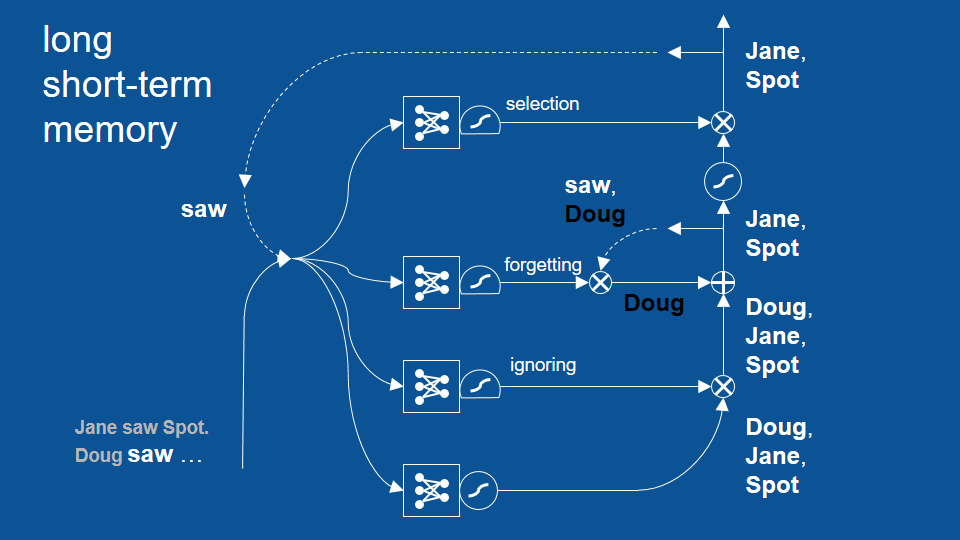